### Importing 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CoilData = pd.read_csv("data/Constriction.csv")

### Cleaning Data

In [100]:
def clean_data(CoilData):
    #Replace *** with nan & drop them
    CoilData = CoilData.replace('^\*+$', np.NaN, regex=True)
    CoilData = CoilData.dropna()

    #Also drop where we couldnt calculate a constriction due to incorrect/missing csv files
    CoilData = CoilData.drop(CoilData[CoilData['constriction'] == -1].index)
    CoilData = CoilData.reset_index(drop=True)
    CoilData = CoilData.drop('Unnamed: 0',1)
    
    #Remove zeros
    CoilData = CoilData.loc[CoilData.Hardness_1 * CoilData.Hardness_2 * CoilData.Width * CoilData.Thickness * CoilData['Temperature before finishing mill'] * CoilData['Temperature after finishing mill'] != 0]
    
    return CoilData


CoilData = clean_data(CoilData)
CoilData

C:\Users\Frede\AppData\Local\Temp/ipykernel_19100/2296322732.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  CoilData = CoilData.drop('Unnamed: 0',1)


,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,s,al,ma,b,n,ti,cr,va,mo,constriction
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,143,304,291,1,34,6,302,0,25,0
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,90,395,384,1,33,12,189,25,7,0
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,115,476,463,1,20,11,288,0,40,0
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,98,306,296,1,21,9,253,0,9,0
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,121,340,329,1,28,8,297,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55322,15618,1,K371,9948,99,1257.3,1183,913,3.27,11,...,160,389,339,1,26,7,199,0,30,0
55323,15620,1,K371,9951,100,1256.6,1180,922,2.68,12,...,160,405,379,1,24,7,194,0,30,1
55324,15621,3,K371,9885,99,1257.2,1182,919,2.68,13,...,159,334,324,1,26,8,248,0,36,0
55325,15622,1,K371,9885,99,1257.1,1194,923,2.68,11,...,159,334,324,1,26,8,248,0,36,0


In [101]:
CoilData.to_csv("data/CleanCoilData.csv")

 ### Exploring Data 

In [102]:
print(CoilData[CoilData['constriction'] == 1].shape)
print(CoilData[CoilData['constriction'] == 0].shape)
CoilData.shape

(3678, 25)
(50830, 25)


(54508, 25)

In [103]:
columns = CoilData.columns.to_list()

##### Draw graphs for each feature

CoilData

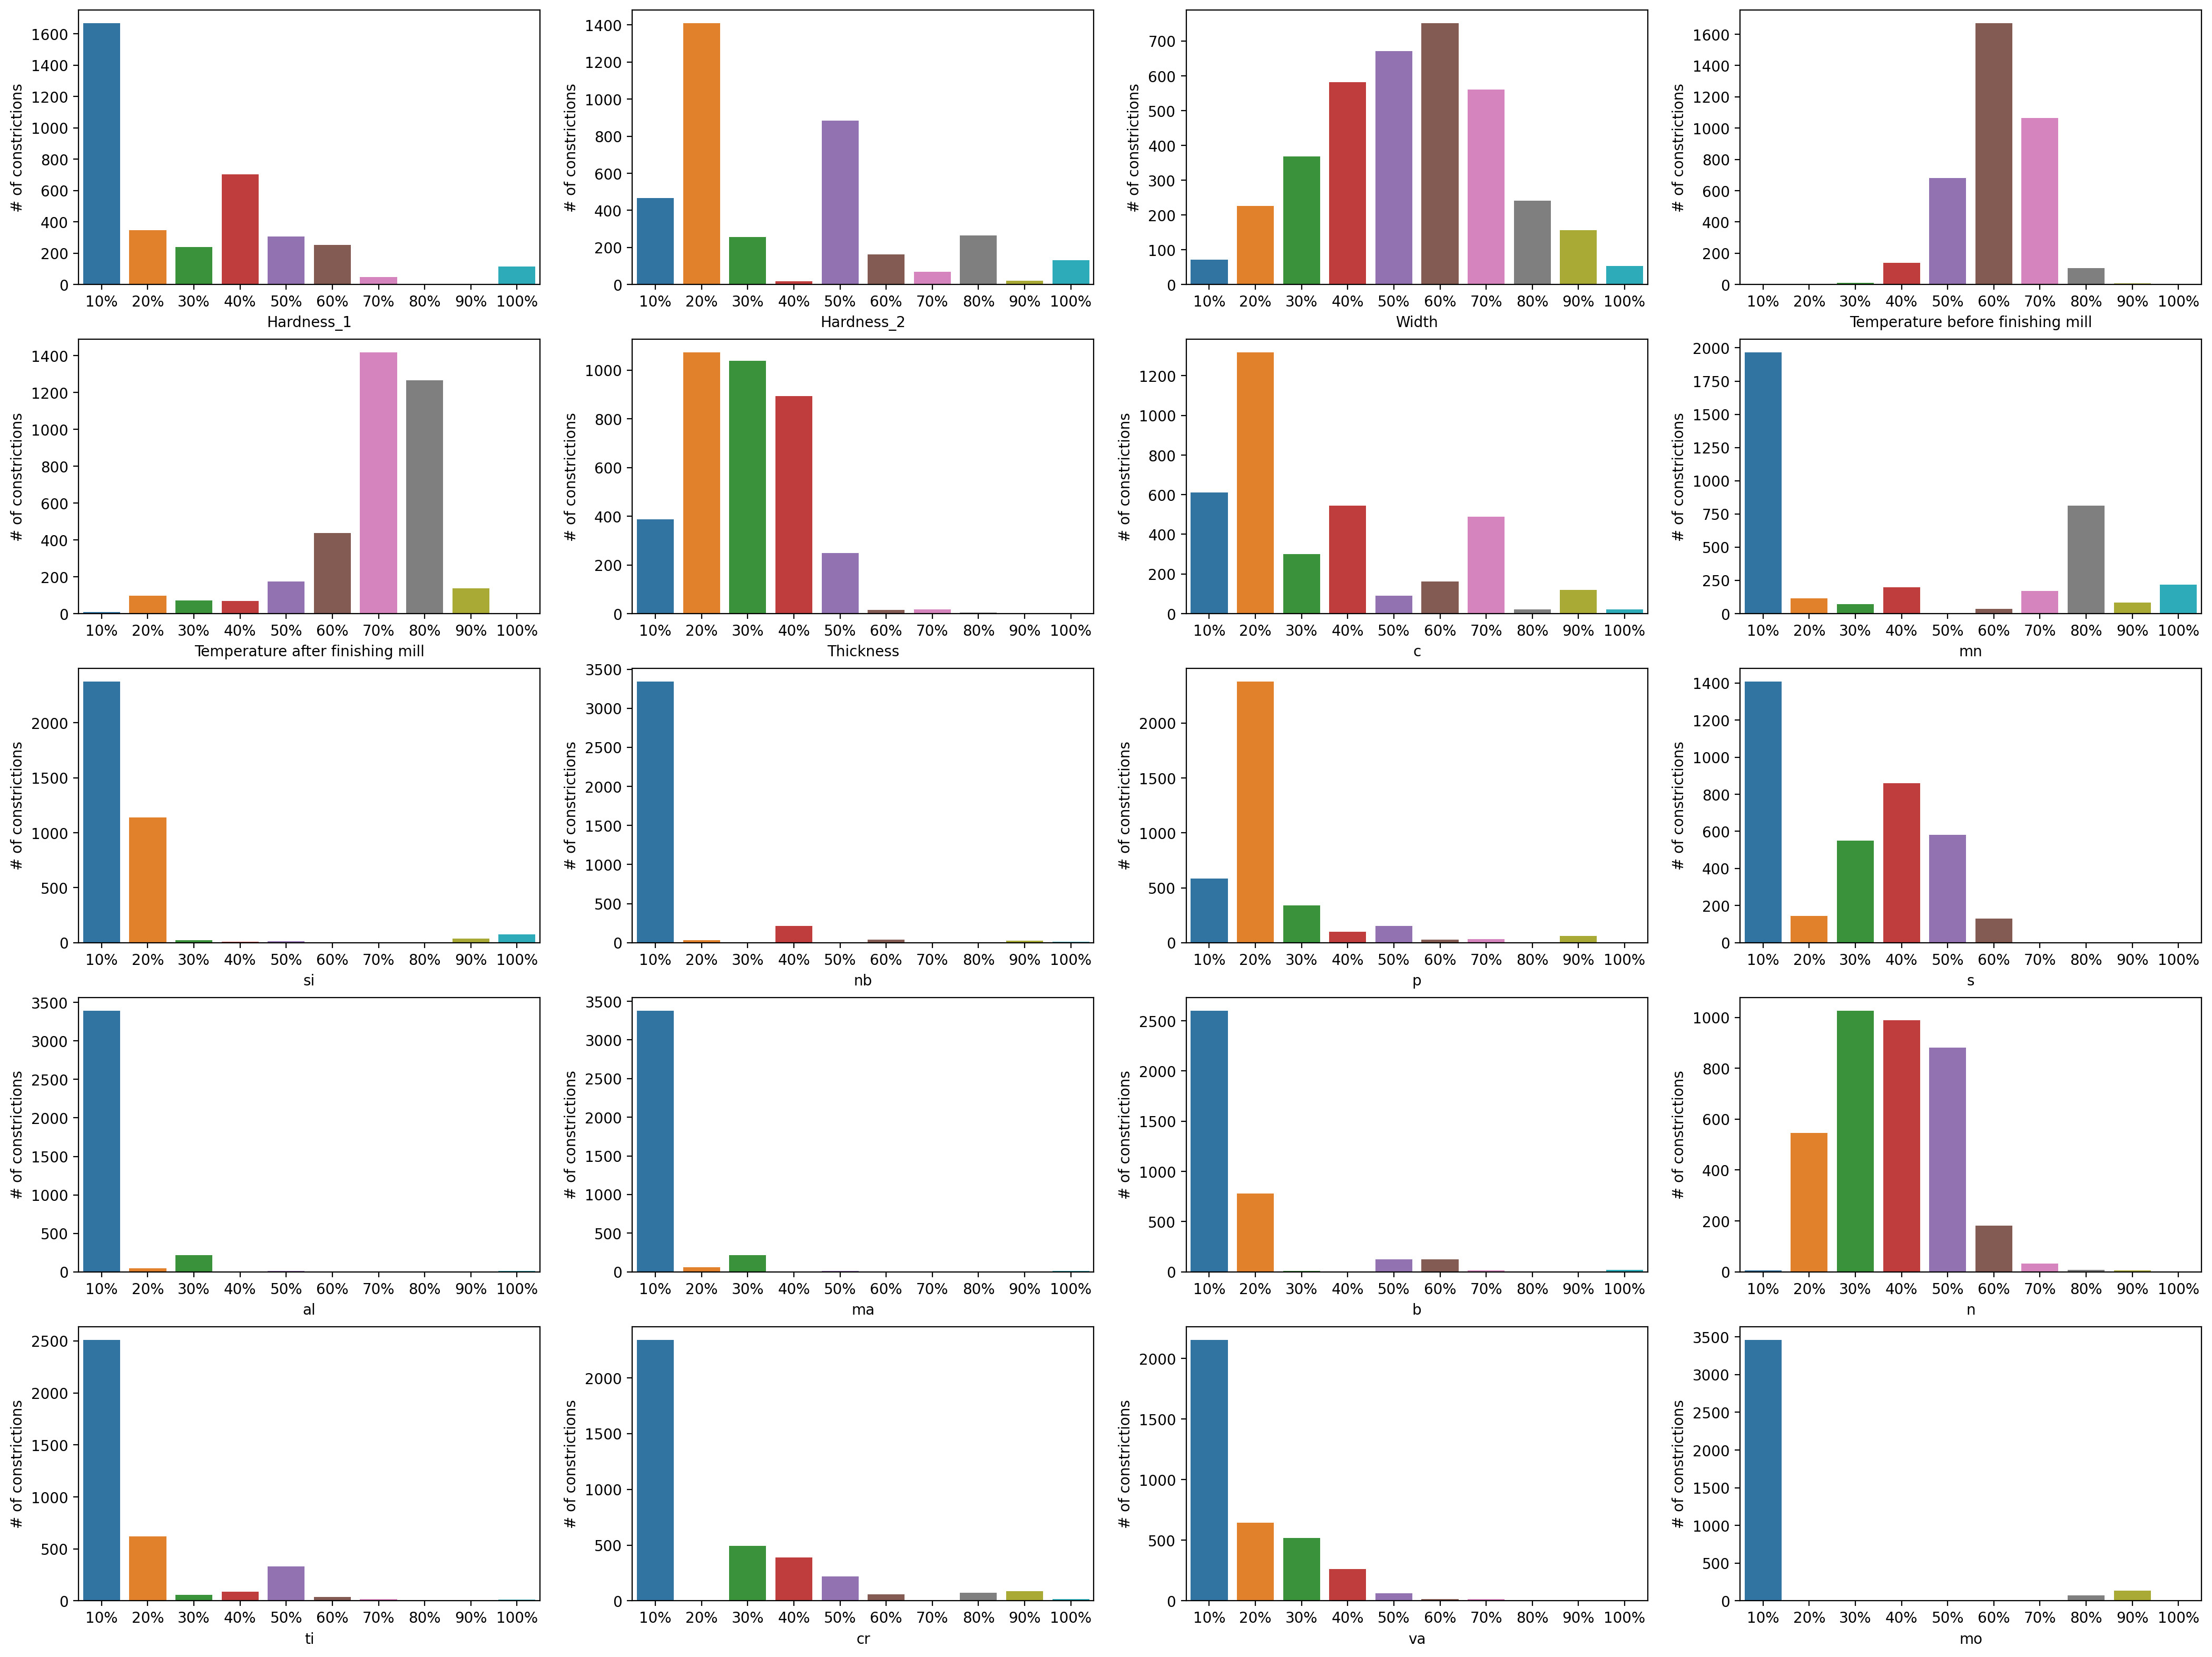

In [104]:
fig, axs = plt.subplots(nrows=5,ncols=4,figsize=(26,20),dpi=200)
i = 0
j = 0

labels = ["10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
total = CoilData.shape[0]

for col in columns[2:]:
    try:
        #Split in bins per feature & number of constrictions
        plotDf = CoilData[[col,'constriction']]
        plotDf = plotDf.sort_values(by=[col])
        
        plotDf[col] = pd.cut(plotDf[col],bins=10)
        plotDf = plotDf.groupby(col).constriction.sum()
        plotDf = pd.DataFrame(plotDf)
        plotDf = plotDf.reset_index()
        
        plotDf['percentage'] = plotDf.apply(lambda x: x.constriction / total,axis=1)
        plotDf[col] = plotDf[col].astype(str)

        #Plot a barplot from the data
        sns.barplot(data=plotDf,x=col,y="constriction",ax=axs[i][j])
        #axs[i][j].set_ylim(0,0.1)

        axs[i][j].set_ylabel("# of constrictions")
        axs[i][j].set_xticklabels(labels)

        j += 1
        if(j % 4 == 0):
            i += 1
            j = 0
        
        
    except:
        continue


### Classification

In [105]:
#Create datasets
important_features = ['Hardness_1', 'Hardness_2', 'Width','Temperature before finishing mill','Temperature after finishing mill', 'Thickness', 'c', 'si', 'p', 'al', 'ma','mn','cr']

X = CoilData[important_features]
y = CoilData['constriction']

In [123]:
#Random UNDERSAMPLING
#"""
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

"""

#Nearest Neighbour Undersamlping
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)
#""



from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X, y)
"""

print(X_resampled.shape)
print(y_resampled.shape)


(7356, 13)
(7356,)


In [124]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25,random_state=0)

#### Models

#### RandomForest

In [125]:
from sklearn.ensemble import RandomForestClassifier
#weights = {0:1.0, 1:1.0}
clf = RandomForestClassifier(max_depth=30)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

##### Classification Report & Confusion Matrix

Score : 0.8325176726481783



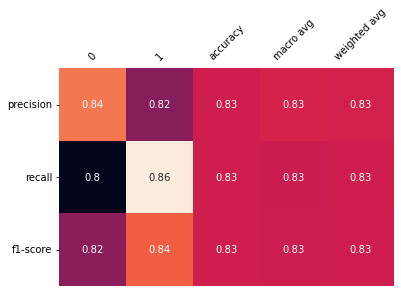

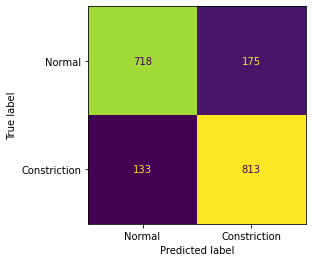

In [126]:
# Evaluate your model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

rep = classification_report(y_test,y_pred,output_dict=True)
print(f"Score : {clf.score(X_test, y_test)}\n")


sns.heatmap(pd.DataFrame(rep).iloc[:-1, :], annot=True,cbar=False)
plt.tick_params(labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 


cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Constriction'])
cmd.plot(colorbar=False)

##### Cross Validation

In [128]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_resampled, y_resampled, cv=15)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 accuracy with a standard deviation of 0.03
